<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: Master Python for scientific programming by solving projects
## PROJECT: Statistics
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [7]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Download and inspect the data

In [10]:
#link google colab and google drive 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/eye_tracker_dot.csv"
data = pd.read_csv(file_path)
data

,N,Name,sex,age,parental_education(1_higher),siblings_amount,phone_1/comp_0,"fixation_duration(millisec,conf>0,6)",stand_otclon_fixation_duration,fixation_dispersion(degrees),stand_otclon_fixation_dispersion,"pupil_diameter(pixels,conf>0,6)",stand_otclon_pupil_diameter,reading_time(sec)
0,1_1,N_S,0,18,0,3,1,124.94,42.56,1.09,0.35,18.11,1.04,29
1,1_2,N_S,0,18,0,3,0,121.19,41.51,1.25,0.23,16.06,1.58,28
2,2_1,T_E,0,17,1,1,1,175.77,48.28,0.93,0.41,26.49,1.81,32
3,2_2,T_E,0,17,1,1,0,176.45,51.07,1.06,0.35,23.84,1.46,30
4,3_1,R_A,0,17,1,0,1,118.43,44.59,1.29,0.24,23.68,1.18,13
5,3_2,R_A,0,17,1,0,0,132.17,49.66,1.12,0.35,23.91,1.39,12
6,4_1,G_A,1,18,0,0,1,150.09,47.22,1.12,0.31,21.71,0.92,20
7,4_2,G_A,1,18,0,0,0,152.41,50.62,1.12,0.33,20.52,1.75,28
8,5_1,T_K,0,17,1,3,1,149.64,51.25,1.17,0.28,28.92,2.19,29
9,5_2,T_K,0,17,1,3,0,140.89,51.09,1.21,0.27,21.46,1.31,27


In [17]:
# describe the data

data.describe()

,sex,age,parental_education(1_higher),siblings_amount,phone_1/comp_0,"fixation_duration(millisec,conf>0,6)",stand_otclon_fixation_duration,fixation_dispersion(degrees),stand_otclon_fixation_dispersion,"pupil_diameter(pixels,conf>0,6)",stand_otclon_pupil_diameter,reading_time(sec)
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000
mean,0.166667,17.333333,0.666667,1.333333,0.500000,144.618333,48.031667,1.129167,0.307500,21.953333,1.454167,24.00000
std,0.389249,0.492366,0.492366,1.302678,0.522233,18.827436,3.445769,0.117431,0.059257,3.629075,0.350622,6.78233
min,0.000000,17.000000,0.000000,0.000000,0.000000,118.430000,41.510000,0.930000,0.220000,16.060000,0.920000,12.00000
25%,0.000000,17.000000,0.000000,0.000000,0.000000,130.362500,46.562500,1.082500,0.262500,19.520000,1.277500,19.75000
50%,0.000000,17.000000,1.000000,1.000000,0.500000,146.720000,48.970000,1.120000,0.320000,21.585000,1.425000,27.50000
75%,0.000000,18.000000,1.000000,3.000000,1.000000,150.670000,50.807500,1.220000,0.350000,23.857500,1.622500,29.00000
max,1.000000,18.000000,1.000000,3.000000,1.000000,176.450000,51.250000,1.290000,0.410000,28.920000,2.190000,32.00000


In [23]:
# variable names

data.keys()

Index(['N', 'Name', 'sex', 'age', 'parental_education(1_higher)',
       'siblings_amount', 'phone_1/comp_0',
       'fixation_duration(millisec,conf>0,6)',
       'stand_otclon_fixation_duration', 'fixation_dispersion(degrees)',
       'stand_otclon_fixation_dispersion', 'pupil_diameter(pixels,conf>0,6)',
       'stand_otclon_pupil_diameter', 'reading_time(sec)'],
      dtype='object')

In [25]:
# variable values

data['fixation_duration(millisec,conf>0,6)']

0     124.94
1     121.19
2     175.77
3     176.45
4     118.43
5     132.17
6     150.09
7     152.41
8     149.64
9     140.89
10    146.73
11    146.71
Name: fixation_duration(millisec,conf>0,6), dtype: float64

In [30]:
# list of unique values and amount of unique values

print(np.unique(data['fixation_duration(millisec,conf>0,6)']))
len(np.unique(data['fixation_duration(millisec,conf>0,6)']))

[118.43 121.19 124.94 132.17 140.89 146.71 146.73 149.64 150.09 152.41
 175.77 176.45]


12

In [33]:
# unique values

for i in data.keys():
  print(f"Column {i} has {len(np.unique(data[i]))} unique values")

Column N has 12 unique values
Column Name has 6 unique values
Column sex has 2 unique values
Column age has 2 unique values
Column parental_education(1_higher) has 2 unique values
Column siblings_amount has 3 unique values
Column phone_1/comp_0 has 2 unique values
Column fixation_duration(millisec,conf>0,6) has 12 unique values
Column stand_otclon_fixation_duration has 12 unique values
Column fixation_dispersion(degrees) has 9 unique values
Column stand_otclon_fixation_dispersion has 9 unique values
Column pupil_diameter(pixels,conf>0,6) has 12 unique values
Column stand_otclon_pupil_diameter has 11 unique values
Column reading_time(sec) has 10 unique values


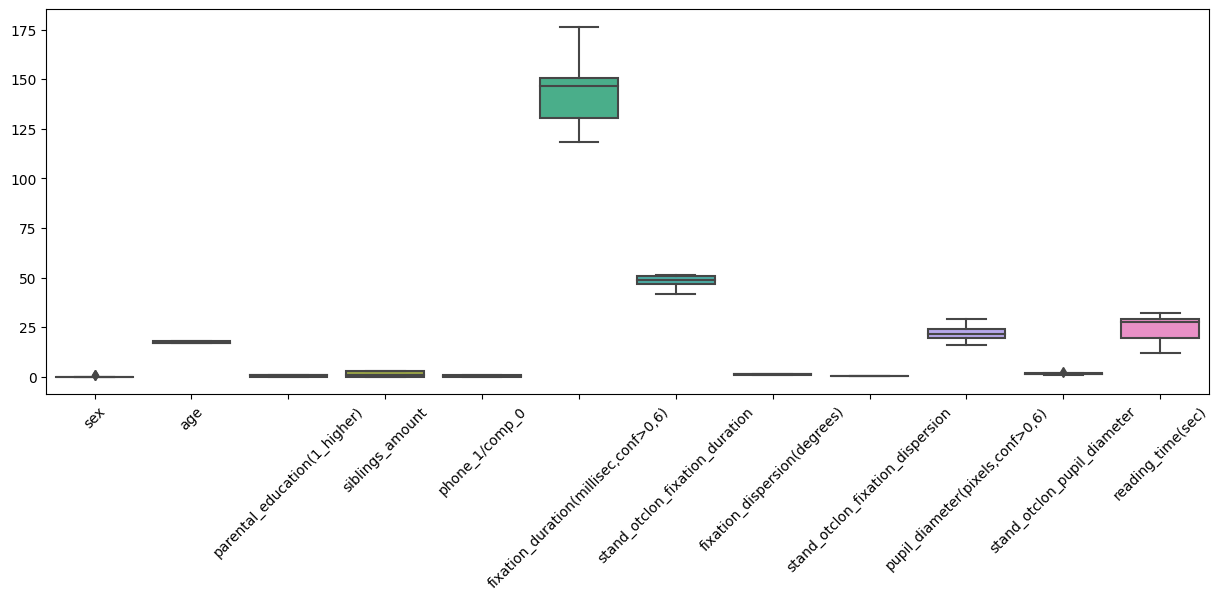

In [43]:
fig,ax = plt.subplots(1,figsize=(15,5))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [45]:
# remove outliers

data = data[data['phone_1/comp_0']< 2 ] 

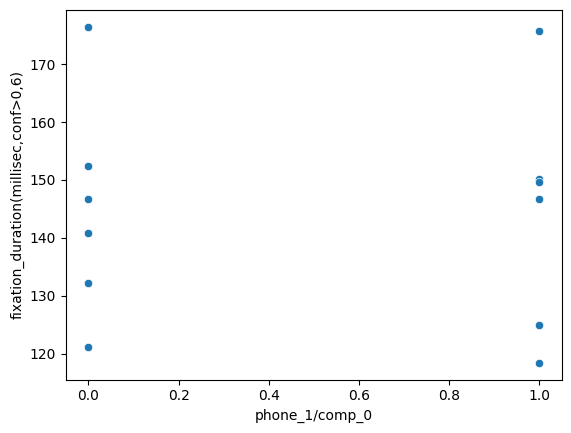

In [48]:
# visual data exploration 

sns.scatterplot(x=data['phone_1/comp_0'],y=data['fixation_duration(millisec,conf>0,6)']) 
plt.show()

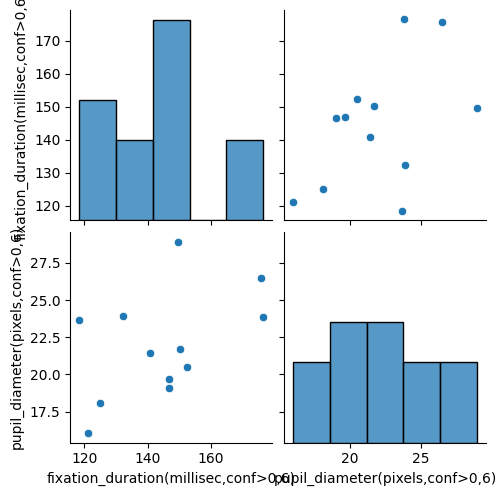

In [52]:
sns.pairplot(data[['fixation_duration(millisec,conf>0,6)', 'pupil_diameter(pixels,conf>0,6)']])
plt.show()

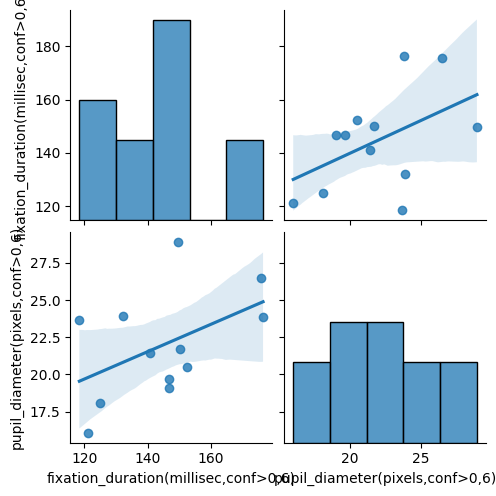

In [53]:
sns.pairplot(data[['fixation_duration(millisec,conf>0,6)', 'pupil_diameter(pixels,conf>0,6)']],kind='reg')
plt.show()

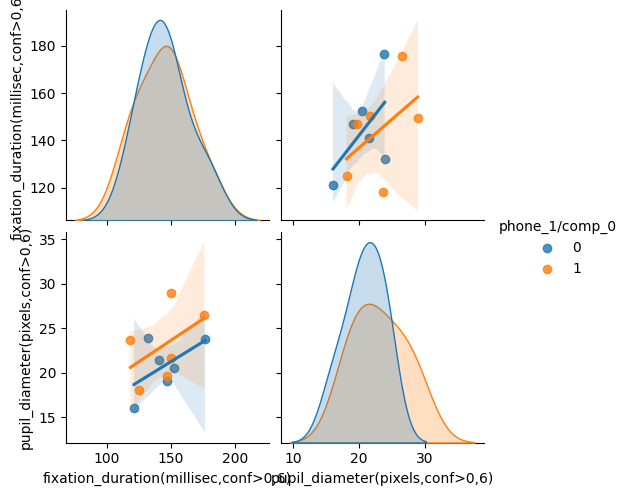

In [60]:
sns.pairplot(data[['fixation_duration(millisec,conf>0,6)','pupil_diameter(pixels,conf>0,6)','phone_1/comp_0']],kind='reg',hue='phone_1/comp_0')
plt.show()

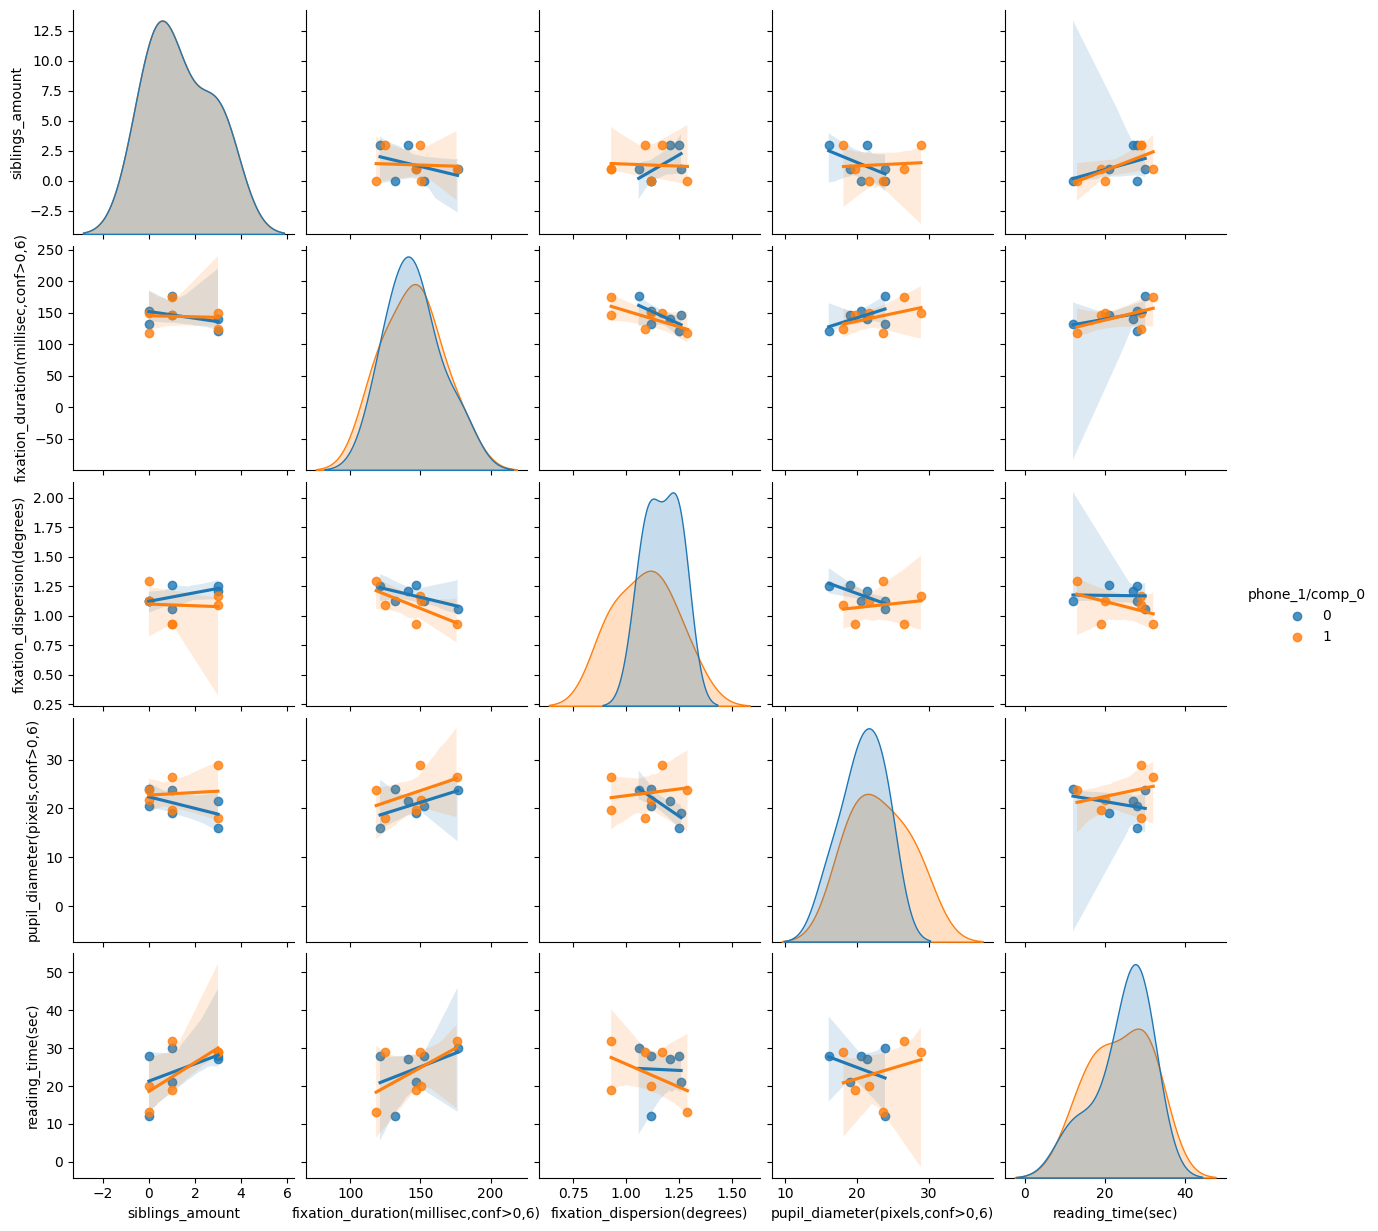

In [61]:
cols2plot = ['siblings_amount', 'phone_1/comp_0',
       'fixation_duration(millisec,conf>0,6)', 'fixation_dispersion(degrees)', 
       'pupil_diameter(pixels,conf>0,6)', 'reading_time(sec)']
sns.pairplot(data[cols2plot],kind='reg',hue='phone_1/comp_0')
plt.show()

# T-test analysis 




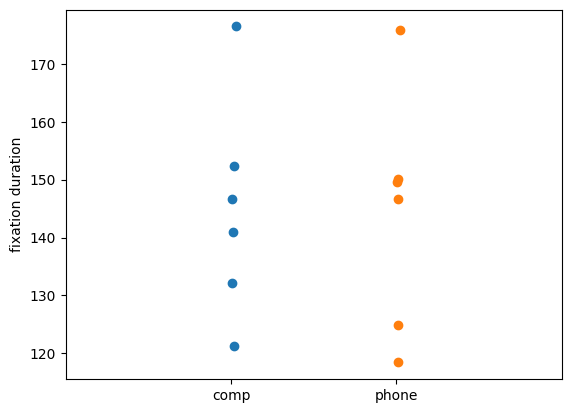

In [74]:
# show the data in a plot

x = data['fixation_duration(millisec,conf>0,6)'][data['phone_1/comp_0'] == 0]
y = data['fixation_duration(millisec,conf>0,6)'][data['phone_1/comp_0'] == 1]


plt.plot(np.random.rand(len(x))/30,x,'o',  
         np.random.rand(len(y))/30+1,y,'o')

plt.xlim([-1,2])                                 # indents on sides
plt.xticks([0,1],labels=['comp','phone'])        # only two values on x 
plt.ylabel('fixation duration')

plt.show()


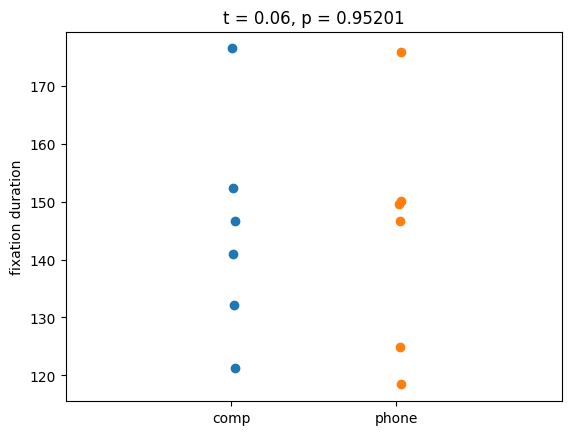

In [84]:
# t-test of fixation_duration on phone/comp

x = data['fixation_duration(millisec,conf>0,6)'][data['phone_1/comp_0'] == 0]
y = data['fixation_duration(millisec,conf>0,6)'][data['phone_1/comp_0'] == 1]

#ttest
ttest = stats.ttest_ind(x,y)


plt.plot(np.random.rand(len(x))/30,x,'o',  
         np.random.rand(len(y))/30+1,y,'o')

plt.xlim([-1,2])                                 # indents on sides
plt.xticks([0,1],labels=['comp','phone'])        # only two values on x 
plt.title(f't = {ttest[0]:.2f}, p = {ttest[1]:.5f}')  # :.2f --- amount(two) of digits after comma
plt.ylabel('fixation duration')

plt.show()


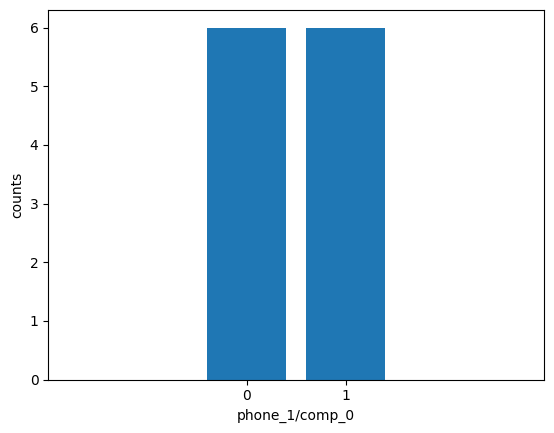

In [100]:
phone_comp = np.zeros(2)

for i in range(0,2):
  phone_comp[i] = len(data[data['phone_1/comp_0'] == i])

plt.bar(range(0,2),phone_comp)
plt.xlabel('phone_1/comp_0')
plt.ylabel('counts')
plt.xlim([-2,3])
plt.xticks([0,1])
plt.show()

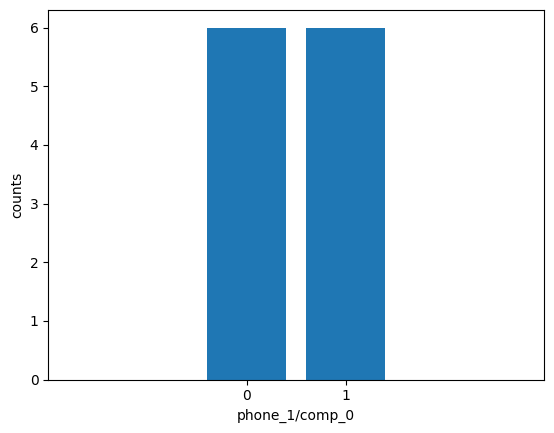

In [106]:
counts = data['phone_1/comp_0'].value_counts()

plt.bar(list(counts.keys()),counts)
plt.xlabel('phone_1/comp_0')
plt.ylabel('counts')
plt.xlim([-2,3])
plt.xticks([0,1])
plt.show()

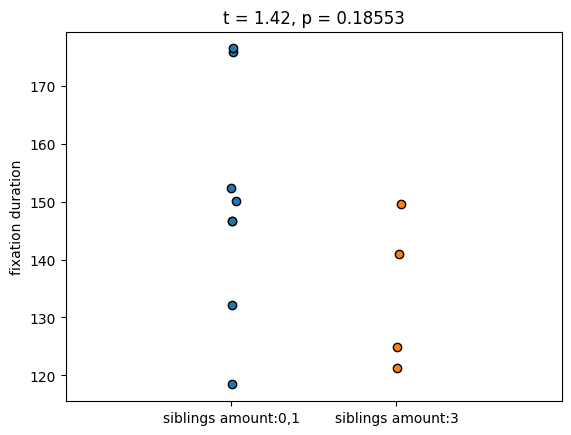

In [110]:
# t-test of fixation_duration on siblings 

x = data['fixation_duration(millisec,conf>0,6)'][(data['siblings_amount'] == 0) | (data['siblings_amount'] == 1)]
y = data['fixation_duration(millisec,conf>0,6)'][data['siblings_amount'] == 3]

#ttest
ttest = stats.ttest_ind(x,y)


plt.plot(np.random.rand(len(x))/30,x,'o',  
         np.random.rand(len(y))/30+1,y,'o',
         markeredgecolor='k')

plt.xlim([-1,2])                                 # indents on sides
plt.xticks([0,1],labels=['siblings amount:0,1','siblings amount:3'])        # only two values on x 
plt.title(f't = {ttest[0]:.2f}, p = {ttest[1]:.5f}')  # :.2f --- amount(two) of digits after comma
plt.ylabel('fixation duration')

plt.show()


# Multiple regression

In [111]:
import statsmodels.api as sm

In [123]:
# predict siblings_amount from all other columns; show in a table 

dep_var  =  data['siblings_amount']                                                                      # dependent variable
ind_vars =  data.drop(labels = ['siblings_amount','Name','N', 'stand_otclon_fixation_duration',          # independent variables
                    'stand_otclon_fixation_dispersion', 'stand_otclon_pupil_diameter'], axis=1)          
ind_vars = sm.add_constant(ind_vars)                                                                     # add an intercept term 

# setup and run the model
model = sm.OLS(dep_var,ind_vars).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        siblings_amount   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     2.968
Date:                Sun, 02 Apr 2023   Prob (F-statistic):              0.155
Time:                        20:22:22   Log-Likelihood:                -8.7362
No. Observations:                  12   AIC:                             33.47
Df Residuals:                       4   BIC:                             37.35
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


reading_time(sec)


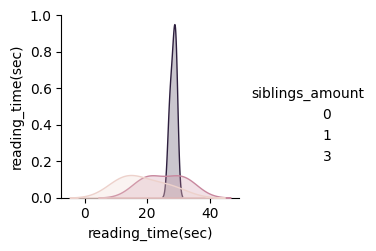

In [141]:
# vertical list of all significant (p<.05) columns

significant_columns = list(model.pvalues[model.pvalues < .07].keys())
[print(i) for i in significant_columns];
significant_columns.append('siblings_amount')

# pairwise plots just for significant effects

sns.pairplot(data[significant_columns],kind = 'reg',hue = 'siblings_amount')

plt.show()


In [ ]:
# 


# Logistic regression

In [177]:
# binarize phone_1/comp_0 (the subject used a computer or telephone)
# binarization threshold

binthresh = np.mean(data['phone_1/comp_0'])

# 'binquality' column with Boolean type True or False

data['binquality'] = data['phone_1/comp_0'] > binthresh
data


,N,Name,sex,age,parental_education(1_higher),siblings_amount,phone_1/comp_0,"fixation_duration(millisec,conf>0,6)",stand_otclon_fixation_duration,fixation_dispersion(degrees),stand_otclon_fixation_dispersion,"pupil_diameter(pixels,conf>0,6)",stand_otclon_pupil_diameter,reading_time(sec),binquality
0,1_1,N_S,0,18,0,3,1,124.94,42.56,1.09,0.35,18.11,1.04,29,True
1,1_2,N_S,0,18,0,3,0,121.19,41.51,1.25,0.23,16.06,1.58,28,False
2,2_1,T_E,0,17,1,1,1,175.77,48.28,0.93,0.41,26.49,1.81,32,True
3,2_2,T_E,0,17,1,1,0,176.45,51.07,1.06,0.35,23.84,1.46,30,False
4,3_1,R_A,0,17,1,0,1,118.43,44.59,1.29,0.24,23.68,1.18,13,True
5,3_2,R_A,0,17,1,0,0,132.17,49.66,1.12,0.35,23.91,1.39,12,False
6,4_1,G_A,1,18,0,0,1,150.09,47.22,1.12,0.31,21.71,0.92,20,True
7,4_2,G_A,1,18,0,0,0,152.41,50.62,1.12,0.33,20.52,1.75,28,False
8,5_1,T_K,0,17,1,3,1,149.64,51.25,1.17,0.28,28.92,2.19,29,True
9,5_2,T_K,0,17,1,3,0,140.89,51.09,1.21,0.27,21.46,1.31,27,False


In [180]:
# create a list containing columns to use in regression
# this is all the columns except for dependent variable and binquality

xcols = []

for key in data.keys():
  if key not in ['phone_1/comp_0','binquality','N','Name','stand_otclon_fixation_duration',
                     'stand_otclon_fixation_dispersion','stand_otclon_pupil_diameter','age','sex',
                 'parental_education(1_higher)']:
                     xcols.append(key)
xcols

['siblings_amount',
 'fixation_duration(millisec,conf>0,6)',
 'fixation_dispersion(degrees)',
 'pupil_diameter(pixels,conf>0,6)',
 'reading_time(sec)']

In [181]:
# setup and run the logistic regression model
model = sm.Logit(data['binquality'],data[xcols])
results = model.fit(method='newton')

# have a look at the results!
results.summary()

Optimization terminated successfully.
         Current function value: 0.551443
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                   12
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            4
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                  0.2044
Time:                        21:53:52   Log-Likelihood:                -6.6173
converged:                       True   LL-Null:                       -8.3178
Covariance Type:            nonrobust   LLR p-value:                    0.4931
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
siblings_amount                          0.2426      0.909      0.267      0.790      -1.539       2.024
fixation_duration(millisec,conf>0,6)    -0.0328      0.060     -0.551      0.581      -0.150       0.084
fixation_dispersion(degrees)            -4.4971      4.003     -1.124      0.261     -12.342       3.348
pupil_diameter(pixels,conf>0,6)          0.4224      0.315      1.339      0.180      -0.196       1.041
reading_time(sec)                        0.0104      0.206      0.051      0.960      -0.393       0.414
========================================================================================================
"""

In [ ]:
# vertical list of significant predictors from the standard (what you computed in the previous video)
# and logistic regressions




# Bonus: Transform to Gaussian

In [ ]:
n = 500
